In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pylab as pl
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D, art3d

In [2]:
def custom_round(x, N):
    """
    Function to round numbers to nearest N
    """
    return(N * round(float(x)/N))

def prepDataFrame(data, zWidth = 5., dR=10.):
    """
    zWidth is the width of z slices
    dR is the width of bins in a histogram with radii
    """
    # Group data into slices in Z
    data["zSlice"] = (data.Z - zWidth/2.).apply(lambda x: custom_round(x, zWidth))
    # Calculate radius (inc. sign based on x)
    data["Radius"] = np.sqrt(data.X**2. + data.Y**2.) * np.sign(data.X)
    data["RadialDose"] = data.Energy/(2.*np.pi*np.abs(data.Radius)*dR*zWidth)

def plotZDose(data, multiple=False, label=""):
    if multiple:
        pyplot.hist(data.Z, weights=data.Energy/10., bins=50, range=(0,500), label=label, histtype="step")
    else:
        pyplot.hist(data.Z, weights=data.Energy/10., bins=50, range=(0,500), label=label)
    pyplot.xlabel("Z (mm)")
    pyplot.ylabel("Energy Deposit (MeV/mm)")
    #pyplot.show()
    
def plotXZ(data, minVal=1.E-6, maxVal=300, XY = (-150, 150)):
    #fig = pyplot.figure(figsize=(20,12))
    n, _, _, _ = pl.hist2d(data.Z, data.X, weights=data.Energy, bins=(500,(XY[1]-XY[0])), norm=LogNorm(), cmap="plasma", range=[(0, 500), XY])
    pyplot.xlabel("Z (mm)", fontsize=12)
    pyplot.ylabel("X (mm)", fontsize=12)
    pyplot.clim(minVal, maxVal)
    cbar = pyplot.colorbar()
    cbar.ax.set_ylabel('Energy Deposit (MeV/mm$^{2}$)', rotation=270)
    #pyplot.tight_layout()
    #pyplot.show()
    
def plotZSlices(data, zPlots = [0., 5., 25., 150, 350], zWidth=5., minVal=1E-12, maxVal=1.3, XY = (-150, 150)):
    fig, axes = pyplot.subplots(3, 2, figsize=(10,10))
    for i in range(0, len(zPlots)):
        z = zPlots[i]
        ax = axes.ravel()[i]
        df = data[data.zSlice==z]
        n, _, _, c = ax.hist2d(df.X, df.Y, weights=df.Energy/(100.*zWidth), bins=((XY[1]-XY[0])/10,(XY[1]-XY[0])/10), norm=LogNorm(minVal, maxVal), cmap="plasma", range=[XY, XY])
        ax.set_title("z: {} mm".format(z + zWidth/2.))
        ax.set_xlabel("X (mm)", fontsize=12)
        ax.set_ylabel("Y (mm)", fontsize=12)
        print(n.max())
        print(n[n>0.].min())
    cbar = pyplot.colorbar(c) #ax=axes.ravel()[0])
    #cbar.ax.set_ylabel('Dose (MeV/mm$^{3}$)', rotation=270)
    #pyplot.tight_layout()
    #pyplot.show()
    
def plotRadialParams(data):
    zVals = []
    avs = []
    stDevs = []
    for z in data.zSlice.unique():
        df = data[data.zSlice == z]
        average = np.average(df.Radius, weights=df.Energy)
        # Weighted standard deviation:
        variance = np.average((df.Radius-average)**2., weights=df.Energy)
        zVals.append(z)
        avs.append(average)
        stDevs.append(np.sqrt(variance))
    zVals = np.array(zVals)
    avs = np.array(avs)
    stDevs = np.array(stDevs)
    inds = zVals.argsort()
    avs = avs[inds]
    stDevs = stDevs[inds]
    zVals = zVals[inds]
    fig, axes = pyplot.subplots(1, 2, figsize=(20, 8))
    axes[0].plot(zVals, avs)
    axes[0].set_xlabel("Z (mm)")
    axes[0].set_ylabel("Energy Weighted Average Radius (mm)")
    axes[1].plot(zVals, stDevs)
    axes[1].set_xlabel("Z (mm)")
    axes[1].set_ylabel("Energy Weighted Radial Standard Deviation (mm)")
    #pyplot.show()
    
def plotRadialSTD(data, label=""):
    zVals = []
    avs = []
    stDevs = []
    for z in data.zSlice.unique():
        df = data[data.zSlice == z]
        average = np.average(df.Radius, weights=df.Energy)
        # Weighted standard deviation:
        variance = np.average((df.Radius-average)**2., weights=df.Energy)
        zVals.append(z)
        avs.append(average)
        stDevs.append(np.sqrt(variance))
    zVals = np.array(zVals)
    avs = np.array(avs)
    stDevs = np.array(stDevs)
    inds = zVals.argsort()
    avs = avs[inds]
    stDevs = stDevs[inds]
    zVals = zVals[inds]
    pyplot.plot(zVals, stDevs, label=label)
    pyplot.xlabel("Z (mm)")
    pyplot.ylabel("Radial Standard Deviation (mm)")
    
def plotRadialDeposits(data, zPlots = [0., 25., 150, 350], zWidth=5.):
    fig, axes = pyplot.subplots(2, 2, figsize=(10,10))
    for i in range(0, len(zPlots)):
        z = zPlots[i]
        ax = axes.ravel()[i]
        df = data[data.zSlice==z]
        ax.hist(df.Radius, weights = df.Energy, bins=20)
        ax.set_title("z: {} mm".format(z + zWidth/2.))
        ax.set_xlabel("Radius (mm)", fontsize=12)
        ax.set_yscale("log")
    #pyplot.show()
    
def plotRadialDoses(data, binRange=(0, 150), bins=15, zPlots = [0., 25., 150, 350], zWidth=5.):
    fig, axes = pyplot.subplots(2, 2, figsize=(10,10))
    for i in range(0, len(zPlots)):
        z = zPlots[i]
        ax = axes.ravel()[i]
        df = data[data.zSlice==z]
        ax.hist(np.abs(df.Radius), weights = df.RadialDose, range=binRange, bins=bins) # Each bin is 10 mm wide
        ax.set_title("z: {} mm".format(z + zWidth/2.))
        ax.set_xlabel("Radius (mm)", fontsize=12)
        ax.set_ylabel("Dose (MeV/mm$^3$)")
        ax.set_yscale("log")
    #pyplot.show()
    
def compRadialDoses(data, binRange=(0, 150), bins=15, zPlots = [0., 25., 150, 350], zWidth=5.):
    for i in range(0, len(zPlots)):
        z = zPlots[i]
        df = data[data.zSlice==z]
        pyplot.hist(np.abs(df.Radius), weights = df.RadialDose, range=binRange, bins=bins, histtype="step", label="{:.1f} mm".format(z + zWidth/2.)) # Each bin is 10 mm wide
    pyplot.title("z: {} mm".format(z + zWidth/2.))
    pyplot.xlabel("Radius (mm)", fontsize=12)
    pyplot.ylabel("Dose (MeV/mm$^3$)")
    pyplot.yscale("log")
    #pyplot.show()
    
    
def gridDose(data, gridSize):
    cols = ["X", "Y", "Z", "Energy"]
    # Copy dataframe
    df = data[cols]
    # Shift Z by half a block, so rounded to middle. 
    df.Z = df.Z - (0.9999*gridSize)/2.
    df.X = df.X.apply(lambda x: custom_round(x, gridSize))
    df.Y = df.Y.apply(lambda x: custom_round(x, gridSize))
    df.Z = df.Z.apply(lambda x: custom_round(x, gridSize))
    df = df.groupby(["X", "Y", "Z"], as_index=False).sum()
    df["Dose"] = df.Energy# per cm^3 with gridSize 10, /(gridSize**3.) # per mm^3
    #bins=np.logspace(np.log10(1.0E-15),np.log10(5.), 50)
    pyplot.hist(df.Dose, bins=50)#bins)
    pyplot.xlabel("Dose (MeV/cm$^3$)")
    pyplot.ylabel("Count")
    return(df)
    
def plot3D(data, gridSize, cmap="cool"):
    df = gridDose(data, gridSize)
    pyplot.close()
    fig = pyplot.figure(figsize=(5,2.75))
    ax = pyplot.axes(projection='3d')
    df = df[df.Dose >= 10] # 0.1
    im = ax.scatter(df.Z, df.X, df.Y, c=df.Dose/100., cmap=cmap, norm=LogNorm(), s=30, depthshade=2)
    im.set_clim(0.1, 40)
    ax.set_xlabel("Z (mm)")
    ax.set_ylabel("X (mm)")
    ax.set_zlabel("Y (mm)")
    ax.set_xlim(0, 500)
    ax.set_ylim(-150, 150)
    ax.set_zlim(-150, 150)
    # rotate the axes
    cbar = fig.colorbar(im)
    #cbar.ax.set_ylabel('Dose (MeV/cm$^{3}$)', rotation=270)
    pyplot.title("Dose, Gy/J$_{in}$")
    ax.view_init(20, 290)

# 10 MeV neutrons

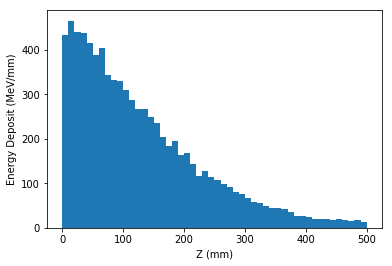

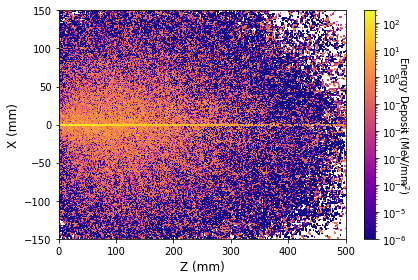

1.0791922704558683
8.149080000000001e-13
1.060588013838781
6.250499999999999e-13
0.8808693963019105
1.4440508e-12
0.2672075228656468
4.92878e-12
0.08355637731910226
3.0208800000000004e-12


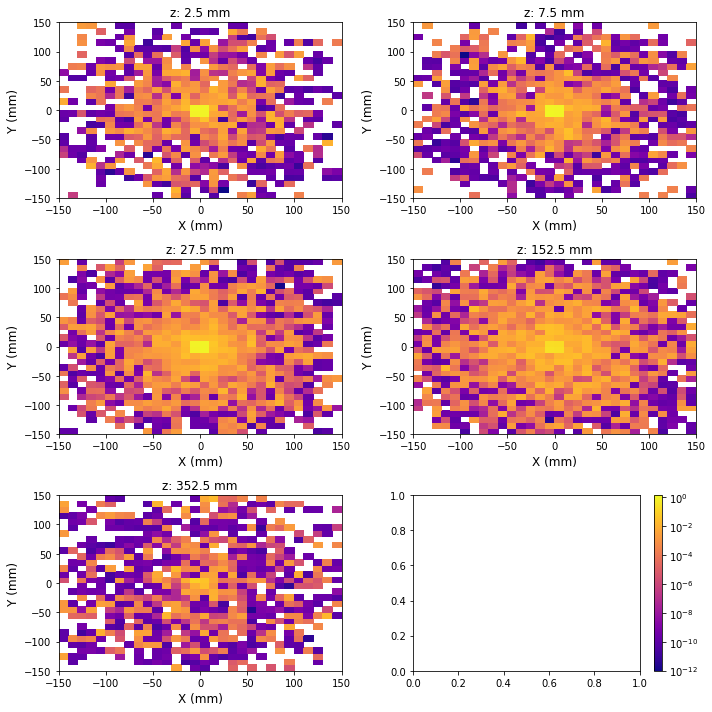

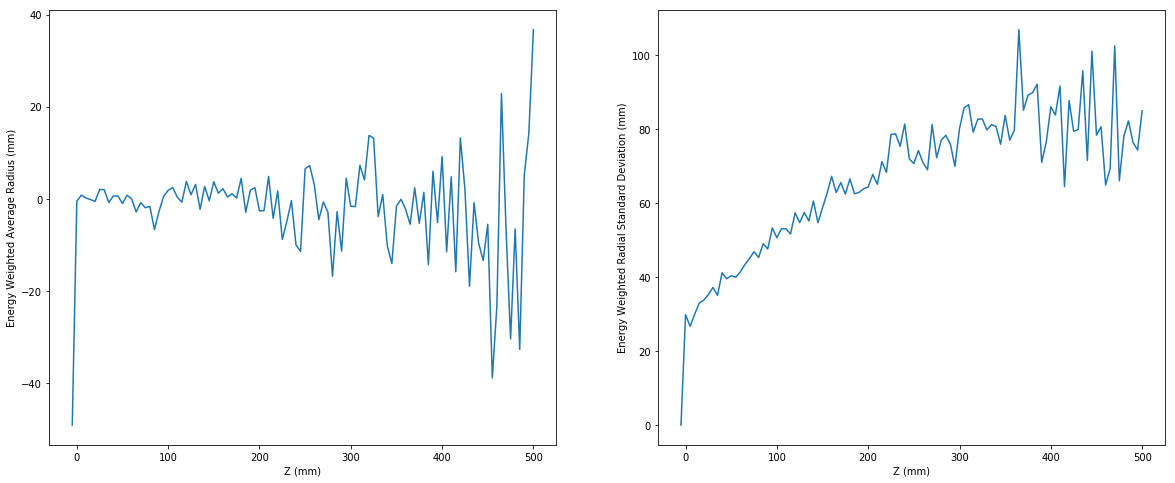

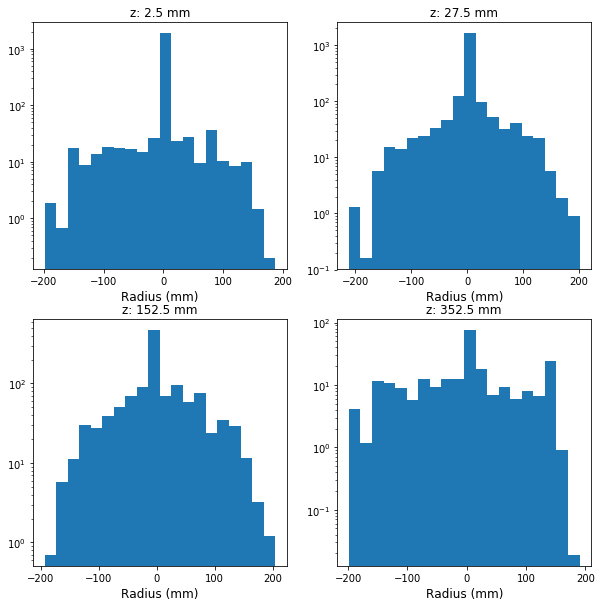

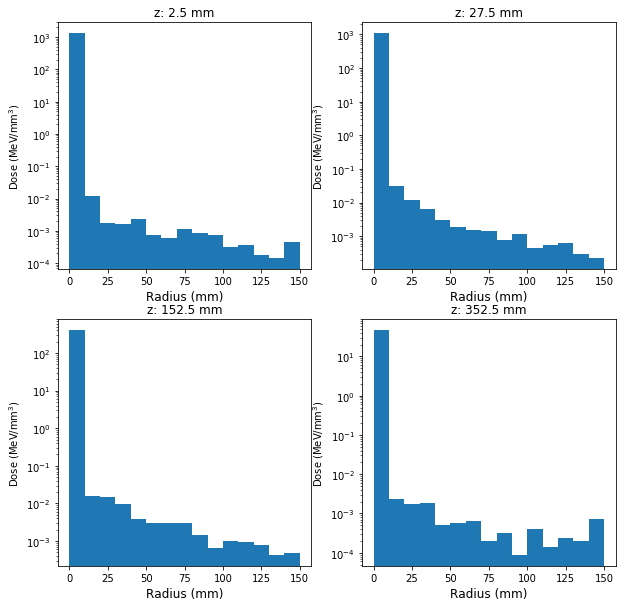

/opt/conda-pdaml/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


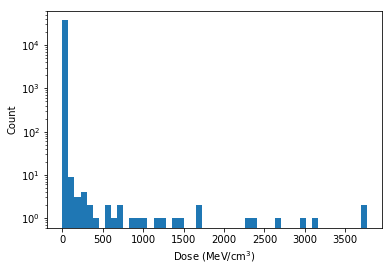

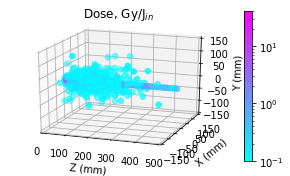

In [3]:
inDir = "Data/10_MeV_Neutrons/"
# Read in data as pandas dataframe
data = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

prepDataFrame(data)
plotZDose(data)
pyplot.show()

plotXZ(data)
pyplot.tight_layout()
pyplot.show()

plotZSlices(data)
pyplot.tight_layout()
pyplot.show()

plotRadialParams(data)
pyplot.show()

plotRadialDeposits(data)
pyplot.show()

plotRadialDoses(data)
pyplot.show()

df = gridDose(data, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

plot3D(data, 10.)
pyplot.show()

In [4]:
data.head()

,X,Y,Z,Energy,zSlice,Radius,RadialDose
0,78.8098,21.13670,9.17562,0.113450,5.0,81.595004,4.425793e-06
1,78.8092,21.13760,9.17562,0.005258,5.0,81.594658,2.051228e-07
2,82.2349,11.72050,11.93590,0.233888,10.0,83.065931,8.962623e-06
3,73.0195,-2.17379,14.30310,0.177160,10.0,73.051850,7.719418e-06
4,53.1821,-9.97306,19.17830,0.391405,15.0,54.109128,2.302534e-05


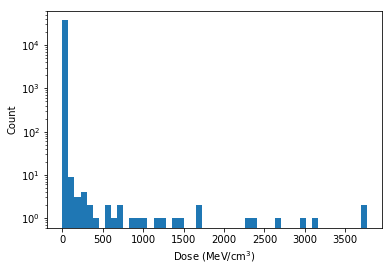

Total Energy Absorbed: 81003.4 MeV. This is 81.00%.
[0.]
[0.]
There are 12 1 cm^3 voxels with a dose >= 1.250e+03 MeV/cm^3.


3764.2164580133153

In [5]:
df = gridDose(data, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(data.Energy.sum(), 100.*data.Energy.sum()/((10.**4.)*10)))
target = 2.E-6 # J/kg/TeV
inE = 0.1 # TeV
MeVperKg = inE * target/(1.6E-13)
MeVperg = MeVperKg/1000.
df = df[df.Dose >= MeVperg]
print(df.X.unique())
print(df.Y.unique())
print("There are {} 1 cm^3 voxels with a dose >= {:.3e} MeV/cm^3.".format(len(df.index), MeVperg))
df.Dose.max()

In [6]:
data.describe()

,X,Y,Z,Energy,zSlice,Radius,RadialDose
count,733453.000000,733453.000000,733453.000000,7.334530e+05,733453.000000,733453.000000,7.334530e+05
mean,-0.859519,0.516795,162.211135,1.104412e-01,159.707105,-1.086766,4.300040e-02
std,61.657526,62.254422,104.977873,4.156017e-01,104.995007,87.618995,1.290761e+00
min,-149.992000,-149.999000,-0.000023,8.780920e-52,-5.000000,-211.380823,4.445372e-55
25%,-42.021600,-40.547600,80.371600,2.955270e-08,80.000000,-75.361485,1.199494e-12
50%,-0.002741,0.003312,144.029000,8.382130e-08,140.000000,-0.006956,4.583442e-12
75%,40.208500,42.735300,225.997000,8.600830e-03,225.000000,73.322943,4.953877e-07
max,149.999000,150.000000,500.000000,7.340070e+00,500.000000,208.580803,5.551928e+02


# 10 MeV photons

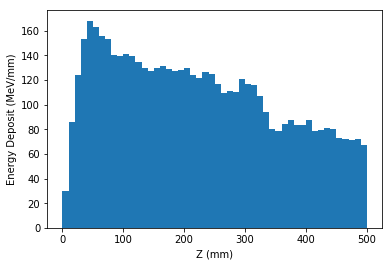

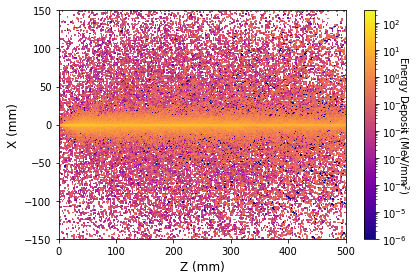

0.033890984190000015
1.135524e-07
0.11571555117599995
8.5248e-08
0.32372952501359975
5.76788e-07
0.2819391653058199
5.6549e-08
0.14262350751599992
5.5308599999999994e-08


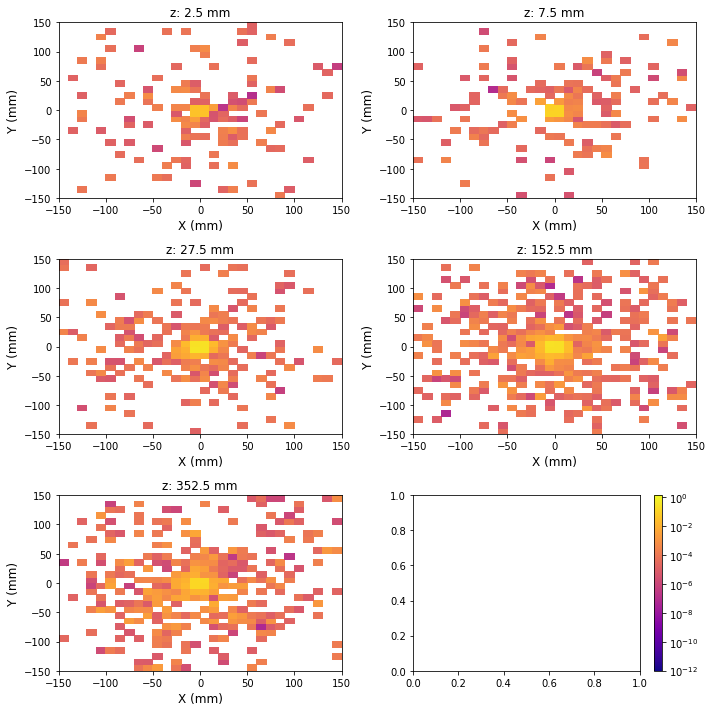

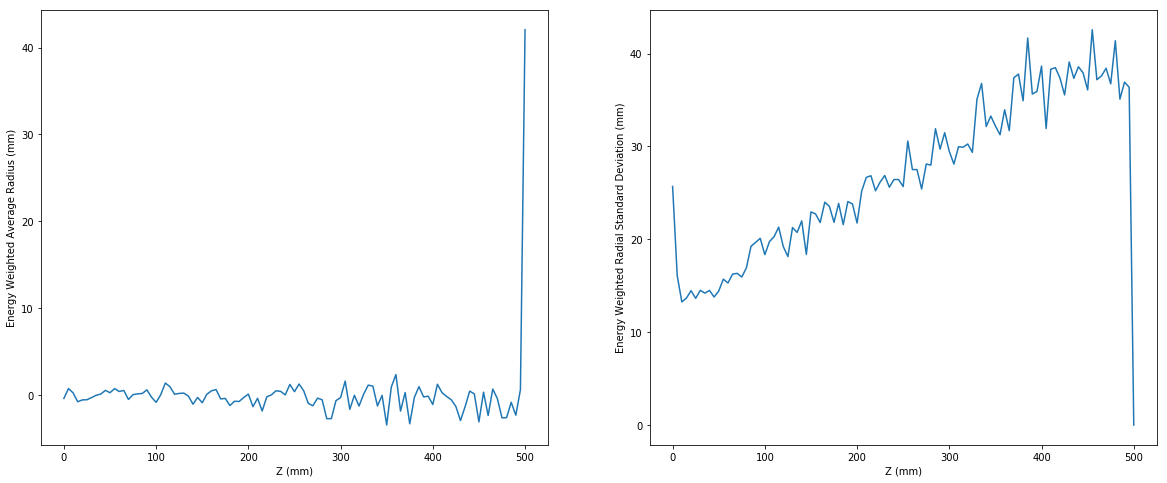

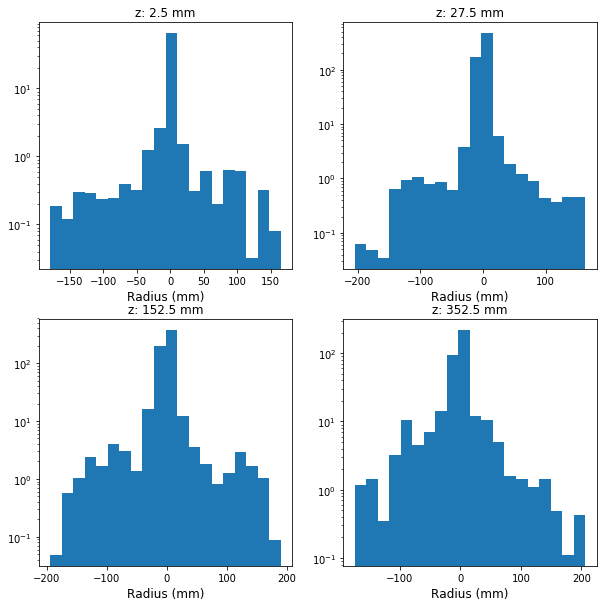

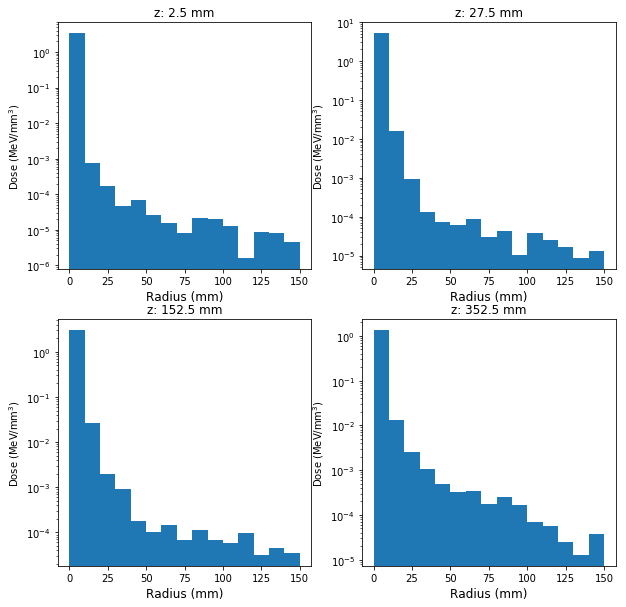

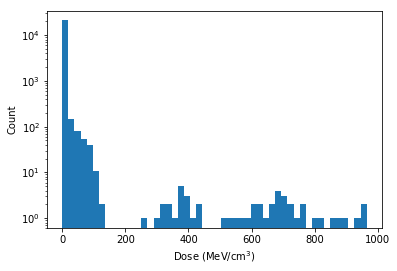

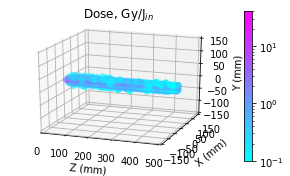

In [7]:
inDirPhoton = "Data/10_MeV_Photons/"
# Read in data as pandas dataframe
dataPhoton = pd.read_csv(inDirPhoton + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

prepDataFrame(dataPhoton)
plotZDose(dataPhoton)
pyplot.show()

#print(dataPhoton.Energy.max())
#print(dataPhoton[dataPhoton.Energy >0].Energy.min())

plotXZ(dataPhoton)
pyplot.tight_layout()
pyplot.show()

plotZSlices(dataPhoton)
pyplot.tight_layout()
pyplot.show()

plotRadialParams(dataPhoton)
pyplot.show()

plotRadialDeposits(dataPhoton)
pyplot.show()

plotRadialDoses(dataPhoton)
pyplot.show()

dfPhoton = gridDose(dataPhoton, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

plot3D(dataPhoton, 10.)
pyplot.show()

In [8]:
print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(dataPhoton.Energy.sum(), 100.*dataPhoton.Energy.sum()/((10.**4.)*10)))
dfPhoton = dfPhoton[dfPhoton.Dose >= 0.1]
print(dfPhoton.X.unique())
print(dfPhoton.Y.unique())
print("There are {} 1 cm^3 voxels with a dose >= 0.1 MeV/mm^3.".format(len(dfPhoton.index)))

Total Energy Absorbed: 55180.3 MeV. This is 55.18%.
[-150. -140. -130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.  -40.
  -30.  -20.  -10.    0.   10.   20.   30.   40.   50.   60.   70.   80.
   90.  100.  110.  120.  130.  140.  150.]
[-150. -130. -110.  -90.  -70.  -40.  -20.  -10.    0.   10.   20.   30.
   40.   50.   60.   70.   80.   90.  100.  140.  150. -140. -120. -100.
  -80.  -60.  -50.  -30.  110.  120.  130.]
There are 8591 1 cm^3 voxels with a dose >= 0.1 MeV/mm^3.


# Neutron Wide

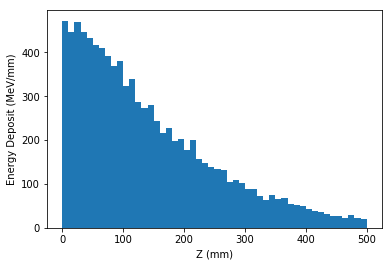

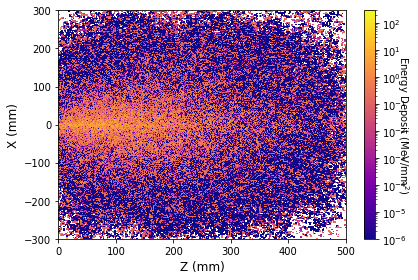

1.1007261979309302
1.63244e-34
1.1944836931336953
6.3976199999999996e-12
0.9231756015272722
1.6419959999999997e-34
0.2861359504817863
1.1735939999999998e-34
0.049385213932817605
2.7368999999999998e-12


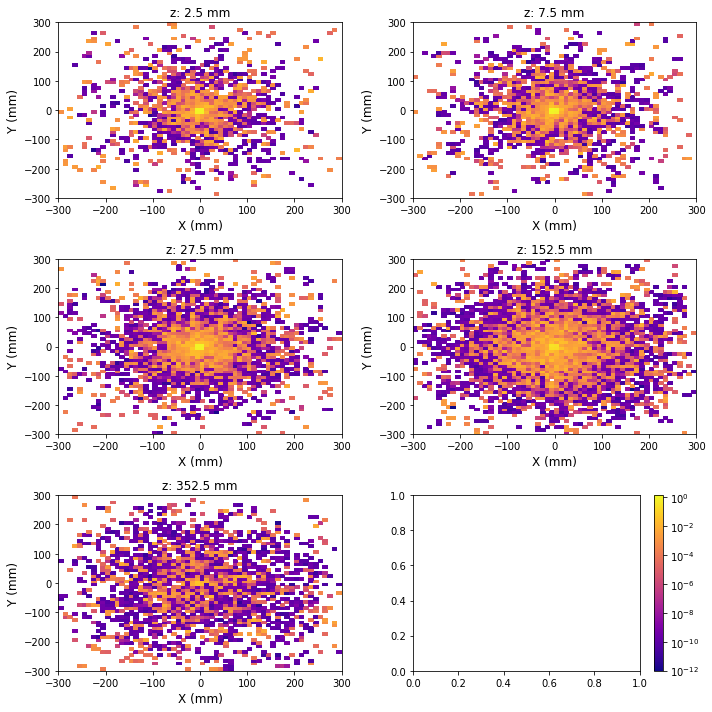

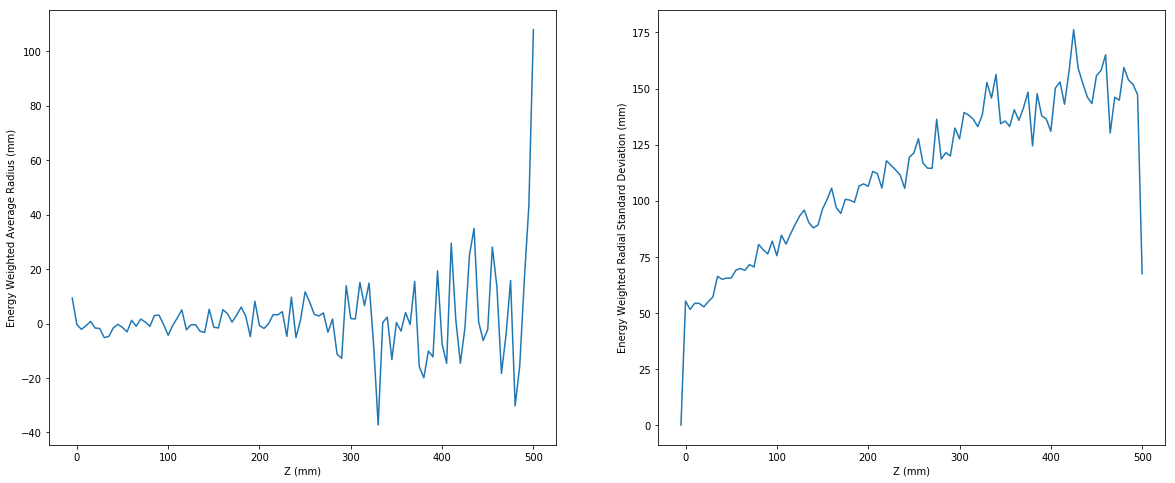

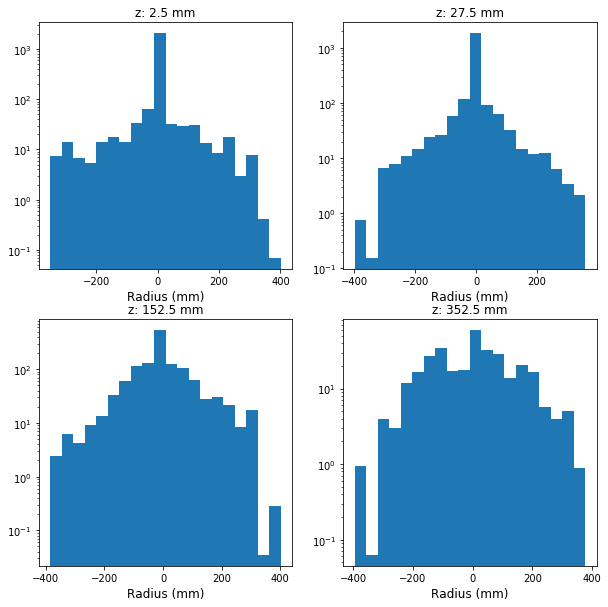

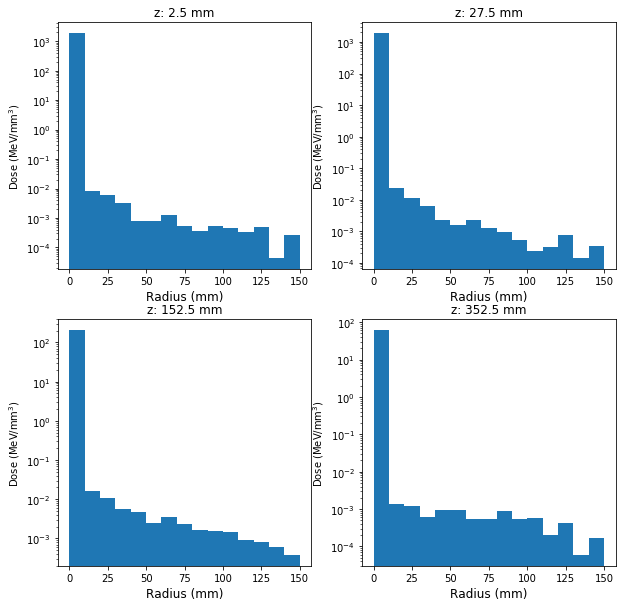

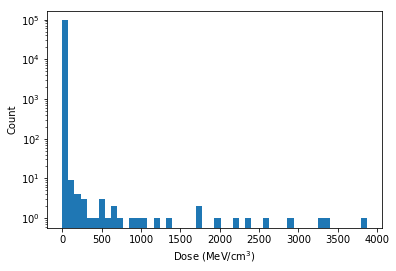

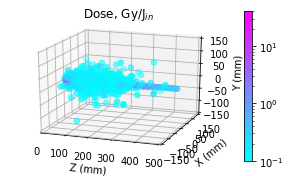

In [9]:
inDirNeutronWide = "Data/10_MeV_Neutrons_60cm_Detector_XY/"
# Read in data as pandas dataframe
dataNeutronWide = pd.read_csv(inDirNeutronWide + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

prepDataFrame(dataNeutronWide)
plotZDose(dataNeutronWide)
pyplot.show()

#print(dataPhoton.Energy.max())
#print(dataPhoton[dataPhoton.Energy >0].Energy.min())

plotXZ(dataNeutronWide, XY = (-300, 300))
pyplot.tight_layout()
pyplot.show()

plotZSlices(dataNeutronWide, XY = (-300, 300))
pyplot.tight_layout()
pyplot.show()

plotRadialParams(dataNeutronWide)
pyplot.show()

plotRadialDeposits(dataNeutronWide)
pyplot.show()

plotRadialDoses(dataNeutronWide)
pyplot.show()

dfNeutronWide = gridDose(dataNeutronWide, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

plot3D(dataNeutronWide, 10.)
pyplot.show()

In [10]:
print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(dataNeutronWide.Energy.sum(), 100.*dataNeutronWide.Energy.sum()/((10.**4.)*10)))
dfNeutronWide = dfNeutronWide[dfNeutronWide.Dose >= 0.1]
print(dfNeutronWide.X.unique())
print(dfNeutronWide.Y.unique())
print("There are {} 1 cm^3 voxels with a dose >= 0.1 MeV/mm^3.".format(len(dfNeutronWide.index)))

Total Energy Absorbed: 92021.7 MeV. This is 92.02%.
[-300. -290. -280. -270. -260. -250. -240. -230. -220. -210. -200. -190.
 -180. -170. -160. -150. -140. -130. -120. -110. -100.  -90.  -80.  -70.
  -60.  -50.  -40.  -30.  -20.  -10.    0.   10.   20.   30.   40.   50.
   60.   70.   80.   90.  100.  110.  120.  130.  140.  150.  160.  170.
  180.  190.  200.  210.  220.  230.  240.  250.  260.  270.  280.  290.
  300.]
[-210. -200. -190. -170. -150.  -90.  -70.  -60.  -50.  -40.  -20.  -10.
   10.   20.   40.   60.   80.   90.  100.  110.  150.  200.  210.  220.
  260.  270.  280. -290. -280. -270. -260. -250. -240. -220. -180. -160.
 -140. -130. -120.  -30.    0.   30.   50.  120.  140.  170.  190.  230.
  240.  250.  290. -300. -230. -110. -100.  -80.   70.  130.  160.  180.
  300.]
There are 28357 1 cm^3 voxels with a dose >= 0.1 MeV/mm^3.


# Neutron Processes

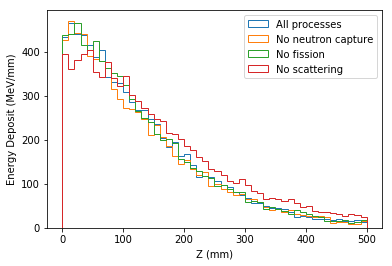

In [11]:
# data is neutrons
inDir = "Data/10_MeV_Neutrons_NoCapture/"
noCapture = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_NoFission/"
noFission = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_NoScattering/"
noScatter = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [data, noCapture, noFission, noScatter]
labels = ["All processes", "No neutron capture", "No fission", "No scattering"]
for i in range(0, 4):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/neutronProcesses.png", dpi=180)
pyplot.show()

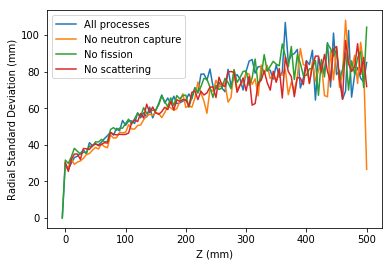

In [12]:
for i in range(0, 4):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/neutronProcessesRad.png", dpi=180)
pyplot.show()

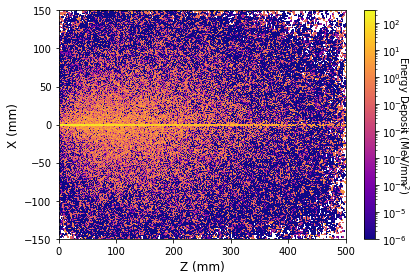

In [13]:
plotXZ(noScatter)
pyplot.tight_layout()
pyplot.show()

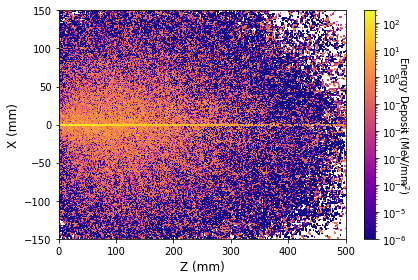

In [14]:
plotXZ(data)
pyplot.tight_layout()
pyplot.show()

# Photon Processes

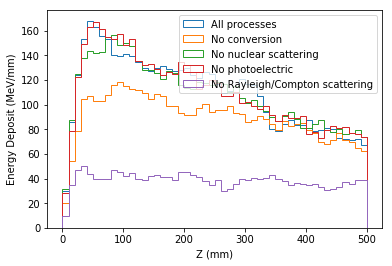

In [15]:
# dataPhoton is all processes
inDir = "Data/10_MeV_Photons_No_Conversion/"
noConv = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_No_NuclearScatter/"
noNucScatter = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_No_Photoelectric/"
noPhoto = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_No_Rayleigh_No_Compton/"
noRaylCompt = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [dataPhoton, noConv, noNucScatter, noPhoto, noRaylCompt]
labels = ["All processes", "No conversion", "No nuclear scattering", "No photoelectric", "No Rayleigh/Compton scattering"]
for i in range(0, 5):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/photonProcesses.png", dpi=180)
pyplot.show()

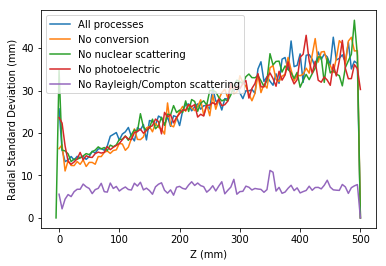

In [16]:
for i in range(0, 5):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/photonProcessesRad.png", dpi=180)
pyplot.show()

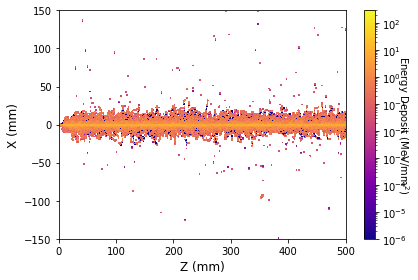

In [17]:
plotXZ(noRaylCompt)
pyplot.tight_layout()
#pyplot.savefig("Data/Figures/PhotonXZNoScatter.png", dpi=180)
pyplot.show()

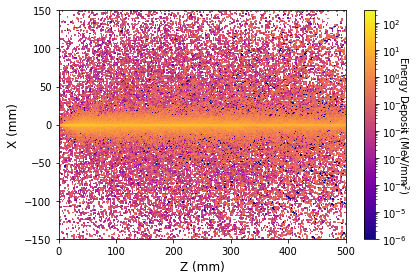

In [18]:
plotXZ(dataPhoton)
pyplot.tight_layout()
#pyplot.savefig("Data/Figures/PhotonXZDefault.png", dpi=180)
pyplot.show()

# Neutron Secondaries

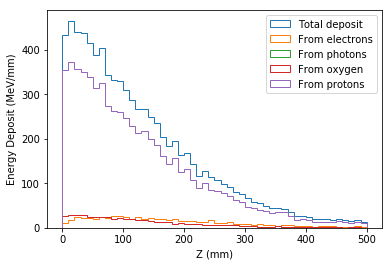

In [19]:
# data is neutrons
inDir = "Data/10_MeV_Neutrons_ElectronDeposit/"
neutronElectrons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_PhotonDeposit/"
neutronPhotons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_O16Deposit/"
neutronOxygen = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_ProtonDeposit/"
neutronProton = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Neutrons_Neutron_Deposit/"
neutronNeutrons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [data, neutronElectrons, neutronPhotons, neutronOxygen, neutronProton]#neutronNeutrons]
labels = ["Total deposit", "From electrons", "From photons", "From oxygen", "From protons"]#, "From neutrons"]
for i in range(0, 5):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/NeutronSecondaries.png", dpi=180)
pyplot.show()

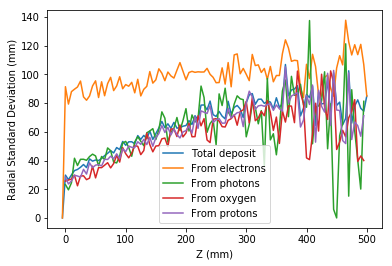

In [20]:
for i in range(0, 5):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/NeutronSecondariesRad.png", dpi=180)
pyplot.show()

# Photon Secondaries

In [21]:
#photonPhotons.head()

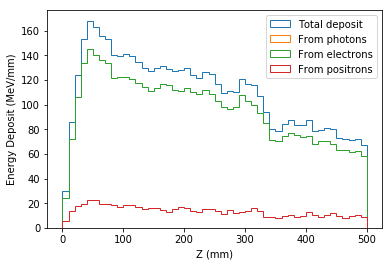

In [22]:
# dataPhotons is all deposits from photons
inDir = "Data/10_MeV_Photons_PhotonDeposit/"
photonPhotons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_ElectronDeposit/"
photonElectrons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_PositronDeposit/"
photonPositrons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10_MeV_Photons_ProtonDeposit/"
photonProtons = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [dataPhoton, photonPhotons, photonElectrons, photonPositrons]#, photonProtons]
labels = ["Total deposit", "From photons", "From electrons", "From positrons"]#, "From protons"]
for i in range(0, 4):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/PhotonSecondaries.png", dpi=180)
pyplot.show()

# Photon deposits < 10^-2 MeV/mm
# Protons deposit no energy

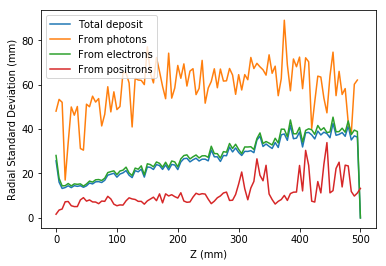

In [23]:
for i in range(0, 4):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/PhotonSecondariesRad.png", dpi=180)
pyplot.show()

# Different Energies
## Photons

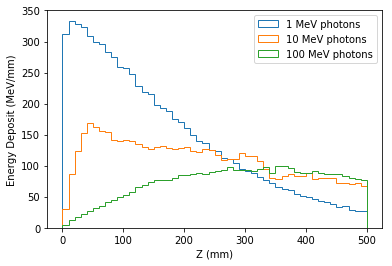

In [24]:
# dataPhotons is all deposits from 10 MeV photons
inDir = "Data/1_MeV_Photons/"
photons1MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/100_MeV_Photons/"
photons100MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [photons1MeV, dataPhoton, photons100MeV]
labels = ["1 MeV photons", "10 MeV photons", "100 MeV photons"]
for i in range(0, 3):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/PhotonEnergies.png", dpi=180)
pyplot.show()

## Neutrons

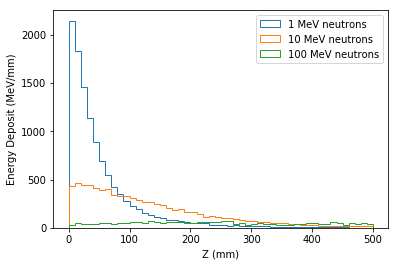

In [25]:
# dataPhotons is all deposits from 10 MeV photons
inDir = "Data/1_MeV_Neutrons/"
neutrons1MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/100_MeV_Neutrons/"
neutrons100MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [neutrons1MeV, data, neutrons100MeV]
labels = ["1 MeV neutrons", "10 MeV neutrons", "100 MeV neutrons"]
for i in range(0, 3):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/NeutronEnergies.png", dpi=180)
pyplot.show()

# Neutron Boron Admixture

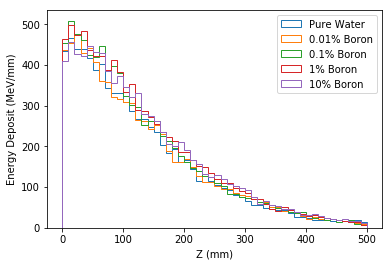

81003.4285736047


In [26]:
# data is neutrons
#inDir = "Data/10MeV_Neutrons_O2_Gap/"
#neutronOxygenGap = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
#inDir = "Data/10MeV_Neutrons_1pc_Gd_Admix/"
#neutronAdmixture = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
#inDir = "Data/10MeV_Neutrons_10pc_Gd_Admix/"
#neutronAdmixture10 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Neutrons_0p01pc_B_Admix/"
neutronAdmixture0p01 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Neutrons_0p1pc_B_Admix/"
neutronAdmixture0p1 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Neutrons_1pc_B_Admix/"
neutronAdmixture = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Neutrons_10pc_B_Admix/"
neutronAdmixture10 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [data, neutronAdmixture0p01, neutronAdmixture0p1, neutronAdmixture, neutronAdmixture10]
labels = ["Pure Water", "0.01% Boron", "0.1% Boron", "1% Boron", "10% Boron"]
for i in range(0, 5):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/NeutronAdmix.png", dpi=180)
pyplot.show()

print(data.Energy.sum())

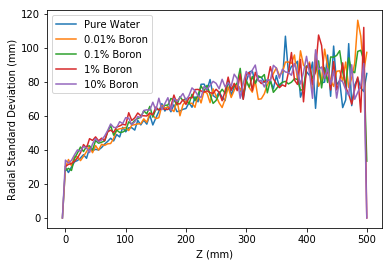

In [27]:
for i in range(0, 5):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
pyplot.show()

# Photon Gd Admixture

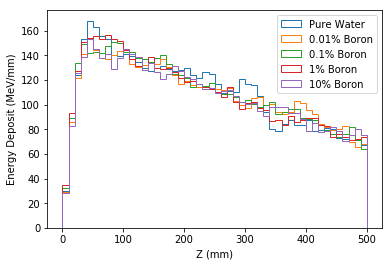

In [28]:
# data is neutrons
#inDir = "Data/10MeV_Photons_1pc_Gd_Admix/"
#photonAdmixture = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
#inDir = "Data/10MeV_Photons_10pc_Gd_Admix/"
#photonAdmixture10 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Photons_1pc_B_Admix/"
photonAdmixture = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Photons_10pc_B_Admix/"
photonAdmixture10 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Photons_0p1pc_B_Admix/"
photonAdmixture0p1 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/10MeV_Photons_0p01pc_B_Admix/"
photonAdmixture0p01 = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

toPlot = [dataPhoton, photonAdmixture0p01, photonAdmixture0p1,  photonAdmixture, photonAdmixture10]
labels = ["Pure Water", "0.01% Boron", "0.1% Boron", "1% Boron", "10% Boron"]
for i in range(0, 5):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.savefig("Data/Figures/PhotonAdmix.png", dpi=180)
pyplot.show()

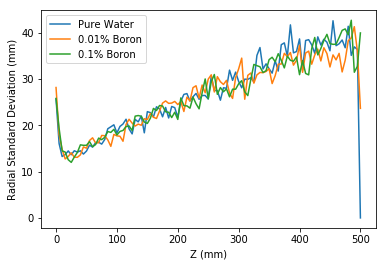

In [29]:
for i in range(0, 3):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
pyplot.show()

In [30]:
neutronPhotons.head()

,X,Y,Z,Energy,zSlice,Radius,RadialDose
0,50.644900,8.569390,128.3690,0.000537,125.0,51.364777,3.329549e-08
1,24.354800,-36.400600,115.8440,0.000537,115.0,43.796803,3.904886e-08
2,-0.028873,-0.019886,90.6625,0.000537,90.0,-0.035058,4.878241e-05
3,0.000978,0.002987,179.2310,0.000537,175.0,0.003144,5.440465e-04
4,-0.001720,-0.003949,11.7022,0.000537,10.0,-0.004307,3.970342e-04


# Neutron Gd Admixture Energies

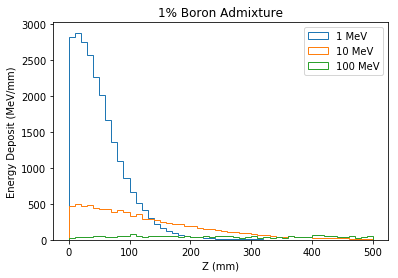

In [31]:
# data is neutrons
inDir = "Data/10MeV_Neutrons_1pc_B_Admix/"
neutronAdmixtureB = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/1MeV_Neutrons_1pc_B_Admix/"
neutronAdmixtureB1MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
inDir = "Data/100MeV_Neutrons_1pc_B_Admix/"
neutronAdmixtureB100MeV = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])


toPlot = [neutronAdmixtureB1MeV, neutronAdmixtureB, neutronAdmixtureB100MeV]
labels = ["1 MeV", "10 MeV", "100 MeV"]
for i in range(0, 3):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
pyplot.title("1% Boron Admixture")
pyplot.show()

In [32]:
neutronElectrons.head()

,X,Y,Z,Energy,zSlice,Radius,RadialDose
0,50.7849,9.57908,128.7320,0.034448,125.0,51.680411,2.121745e-06
1,40.2827,-65.39010,101.3380,0.005438,100.0,76.802090,2.253767e-07
2,43.8986,-1.40654,107.3660,0.004057,105.0,43.921127,2.940327e-07
3,21.2343,-2.90252,87.0691,0.004274,85.0,21.431755,6.348166e-07
4,14.9701,9.05414,93.3426,0.008143,90.0,17.495181,1.481473e-06


# 10 MeV Photon/Neutron Comparison

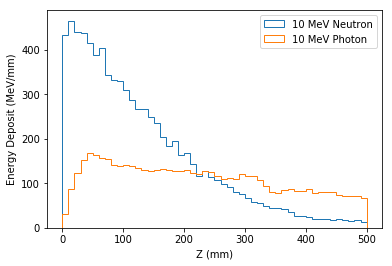

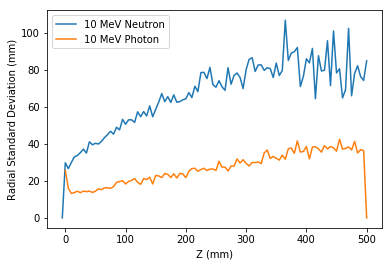

In [33]:
toPlot = [data, dataPhoton]
labels = ["10 MeV Neutron", "10 MeV Photon"]
for i in range(0, 2):
    plotZDose(toPlot[i], multiple=True, label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/10MeVComp.png", dpi=180)
pyplot.show()

for i in range(0, 2):
    prepDataFrame(toPlot[i])
    plotRadialSTD(toPlot[i], label=labels[i])
pyplot.legend()
#pyplot.savefig("Data/Figures/Radial10MeVComp.png", dpi=180)
pyplot.show()

1.0791922704558683
8.149080000000001e-13
1.060588013838781
6.250499999999999e-13
0.8808693963019105
1.4440508e-12
0.2672075228656468
4.92878e-12
0.08355637731910226
3.0208800000000004e-12


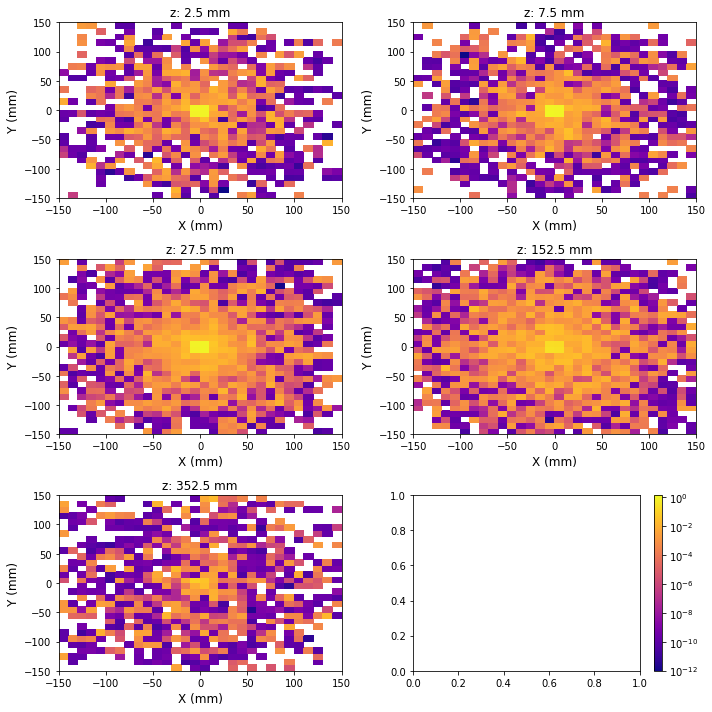

In [34]:
plotZSlices(data)
pyplot.tight_layout()
#pyplot.savefig("Data/Figures/NeutronXY.png", dpi=180)
pyplot.show()

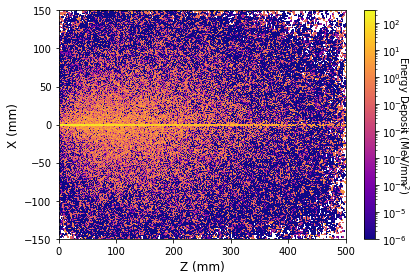

In [35]:
plotXZ(noScatter)
pyplot.tight_layout()
pyplot.show()

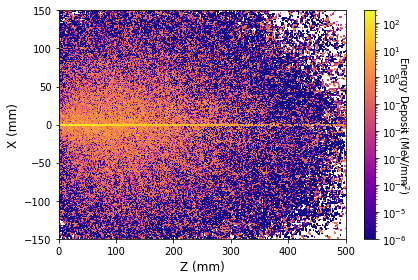

In [36]:
plotXZ(data)
pyplot.tight_layout()
pyplot.show()

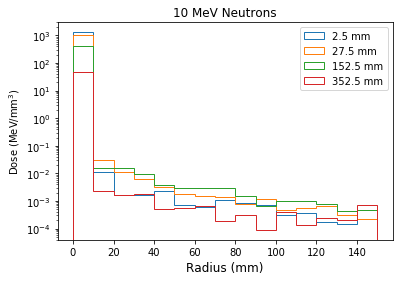

In [37]:
compRadialDoses(data, binRange=(0, 150), bins=15, zPlots = [0., 25., 150, 350], zWidth=5.)
pyplot.legend()
pyplot.title("10 MeV Neutrons")
#pyplot.savefig("Data/Figures/NeutronRadDose.png", dpi=180)
pyplot.show()

In [38]:
(data.Energy.sum()*1.E6)*(1.6E-19)/45. #J/kg

2.880121904839278e-10

# Dosimetry

In [39]:
def convert(energy, mass=45., inE=1.E5):
    # Energies in MeV
    EJoule = energy*1.6E-13 # Joules
    inEJoule = inE*1.6E-13 # Joules
    dose = EJoule/mass
    print("Dose is {:.2E} Gy".format(dose))
    print("This is {:.2E} Gy/TeV".format(dose/(inE/1.E6)))
    print("This is {:.2E} Gy/J".format(dose/inEJoule))
    
print("Neutrons:")
convert(data.Energy.sum())
print("\nPhotons:")
convert(dataPhoton.Energy.sum())

Neutrons:
Dose is 2.88E-10 Gy
This is 2.88E-09 Gy/TeV
This is 1.80E-02 Gy/J

Photons:
Dose is 1.96E-10 Gy
This is 1.96E-09 Gy/TeV
This is 1.23E-02 Gy/J


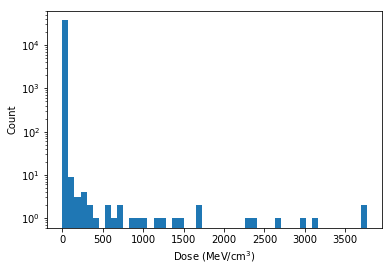

Total Energy Absorbed: 81003.4 MeV. This is 81.00%.
[0.]
[0.]
There are 34 1 cm^3 voxels with a dose >= 1.000e+02 MeV/cm^3.
maximum dose:
Dose is 6.02E-07 Gy
This is 6.02E-06 Gy/TeV
This is 3.76E+01 Gy/J


3764.2164580133153

In [40]:
df = gridDose(data, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(data.Energy.sum(), 100.*data.Energy.sum()/((10.**4.)*10)))
target = 1. # J/kg/J_{in}
inE = 0.1E12*1.6E-19 # J
JperKg = inE * target # J/kg
MeVperKg = JperKg/(1.6E-13)
MeVperg = MeVperKg/1000.
df = df[df.Dose >= MeVperg]
print(df.X.unique())
print(df.Y.unique())
print("There are {} 1 cm^3 voxels with a dose >= {:.3e} MeV/cm^3.".format(len(df.index), MeVperg))

print("maximum dose:")
convert(df.Dose.max(), mass=1.E-3, inE=1.E5)

df.Dose.max()

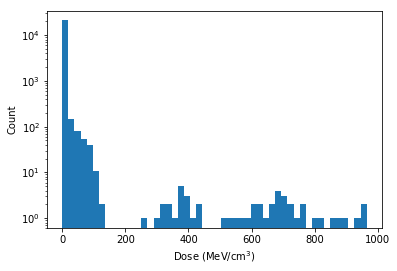

Total Energy Absorbed: 55180.3 MeV. This is 55.18%.
[-10.   0.  10.]
[  0. -10.  10.]
There are 61 1 cm^3 voxels with a dose >= 1.000e+02 MeV/cm^3.
maximum dose:
Dose is 1.54E-07 Gy
This is 1.54E-06 Gy/TeV
This is 9.65E+00 Gy/J


964.6413608747492

In [41]:
df = gridDose(dataPhoton, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(dataPhoton.Energy.sum(), 100.*dataPhoton.Energy.sum()/((10.**4.)*10)))
target = 1. # J/kg/J_{in}
inE = 0.1E12*1.6E-19 # J
JperKg = inE * target # J/kg
MeVperKg = JperKg/(1.6E-13)
MeVperg = MeVperKg/1000.
df = df[df.Dose >= MeVperg]
print(df.X.unique())
print(df.Y.unique())
print("There are {} 1 cm^3 voxels with a dose >= {:.3e} MeV/cm^3.".format(len(df.index), MeVperg))

print("maximum dose:")
convert(df.Dose.max(), mass=1.E-3, inE=1.E5)

df.Dose.max()

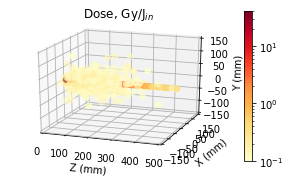

In [42]:
plot3D(data, 10., cmap="YlOrRd")
#pyplot.savefig("Data/Figures/NeutronScatterPlot.png", dpi=180)
pyplot.show()

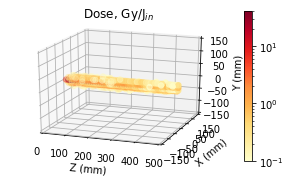

In [43]:
plot3D(dataPhoton, 10., cmap="YlOrRd")
#pyplot.savefig("Data/Figures/PhotonScatterPlot.png", dpi=180)
pyplot.show()
# Last report: 
# https://amp.businessinsider.com/images/56fdb998dd08951c768b4a58-640-480.jpg

# LET Calculation

In [44]:
def getLET(data, NParticles=10000):
    # Bin histogram entries, get deposit per mm.
    deps, bins, _ = pyplot.hist(data.Z, weights=data.Energy, bins=500, range=(0,500))
    pyplot.close()
    # Average deposit per mm:
    avDep = np.average(deps)/NParticles
    return(avDep)

inDir = "Data/10_MeV_Neutrons/"
# Read in data as pandas dataframe
data = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
print("Neutron LET: {:.3f} keV/mm".format(1000.*getLET(data)))

inDirPhoton = "Data/10_MeV_Photons/"
# Read in data as pandas dataframe
dataPhoton = pd.read_csv(inDirPhoton + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])
print("Photon LET: {:.3f} keV/mm".format(1000.*getLET(dataPhoton)))

Neutron LET: 16.201 keV/mm
Photon LET: 11.036 keV/mm


# LET Calculation (1st 100 mm)

In [45]:
def getLET100(data, NParticles=10000):
    df = data[data.Z <= 100.]
    # Bin histogram entries, get deposit per mm.
    deps, bins, _ = pyplot.hist(df.Z, weights=df.Energy, bins=100, range=(0,100))
    pyplot.close()
    # Average deposit per mm:
    avDep = np.average(deps)/NParticles
    return(avDep)

print("Neutron LET: {:.3f} keV/mm".format(1000.*getLET100(data)))
print("Photon LET: {:.3f} keV/mm".format(1000.*getLET100(dataPhoton)))

Neutron LET: 39.898 keV/mm
Photon LET: 13.138 keV/mm


# Quantitative Analysis:

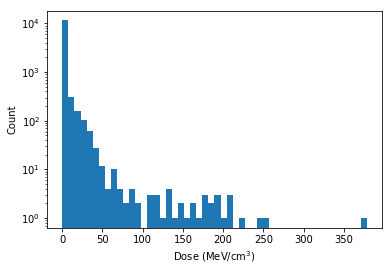

Total Energy Absorbed: 24020.6 MeV. This is 24.02%.
Dose is 8.54E-11 Gy
This is 8.54E-10 Gy/TeV
This is 5.34E-03 Gy/J
[0.]
[0.]

There are 34 1 cm^3 voxels with a dose >= 1.000e+02 MeV/cM^3, which is 1.0 Gy/J.

Max dose: 378.4916541649997 MeV/cm^3
Dose is 6.06E-08 Gy
This is 6.06E-07 Gy/TeV
This is 3.78E+00 Gy/J

500 mm LET: 4.804 keV/mm
100 mm LET: 4.406 keV/mm


In [46]:
#inDir = "Data/1_MeV_Neutrons_New/"
#dataFrame = pd.read_csv(inDir + "Data.csv", comment = "#", names=["X", "Y", "Z", "Energy"])

dataFrame = neutrons100MeV
df = gridDose(dataFrame, 10.)
pyplot.yscale("log")
#pyplot.xscale("log")
pyplot.show()

print("Total Energy Absorbed: {:.1f} MeV. This is {:.2f}%.".format(dataFrame.Energy.sum(), 100.*dataFrame.Energy.sum()/((10.**4.)*10)))
convert(dataFrame.Energy.sum())

target = 1. # J/kg/J
inE = 0.1 # TeV
MeVperKg = inE * target*(1.0E6)
MeVperg = MeVperKg/1000.
df = df[df.Dose >= MeVperg]
print(df.X.unique())
print(df.Y.unique())
print("\nThere are {} 1 cm^3 voxels with a dose >= {:.3e} MeV/cM^3, which is {:.1f} Gy/J.".format(len(df.index), MeVperg, target))

print("\nMax dose: {} MeV/cm^3".format(df.Dose.max()))
convert(df.Dose.max(), mass=1.E-3, inE=1.E5)

print("\n500 mm LET: {:.3f} keV/mm".format(1000.*getLET(dataFrame)))
print("100 mm LET: {:.3f} keV/mm".format(1000.*getLET100(dataFrame)))